python 3.11.9


DATA ANALYSIS IN HOSPITALITY DOMAIN

- a company which onws multiple hotels in India 
- they have many type of room .
- room booking by - website , 3rd party booking apps
- all booking data of verious platfrom connected to a single database(booking database) 
- they have heavy compitiror in market 
- and want to increse their revenue 



In [1]:
import pandas as pd

In [14]:
df_booking = pd.read_csv("datasets/fact_bookings.csv")
print("data loaded - fact_bookings.csv")
# looking for 4 rows to know what data i have
df_booking.head(4)

data loaded - fact_bookings.csv


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640


- lets understand the dataframe 
- unique booking id 
- unique property id
- i have booking date , check in date , chackout date with no of guests
- i have unique room category maybe multiple 
- i have muiltiple booking platform 
- i have rating 
- booking status 
- based on booking status we have 2 type revenue 
- 1 revenue that generated , 2 after cancelation charge /tips/ discount we have real revenue

In [ ]:
# i want to know how many rows and columns i have
df_booking.shape

(134590, 12)

In [4]:
# as i saw  have room category , so i want to know how many room category i have
df_booking.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

['RT1', 'RT2', 'RT3', 'RT4']  i have 4 room category 

In [5]:
# now i want to know how many ways i have for booking a room in hotels
df_booking.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip', 'journey', 'direct offline']
- so ihave 7 booking methods 

In [6]:
# now i want to know the value of booking for eash platform 
df_booking.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

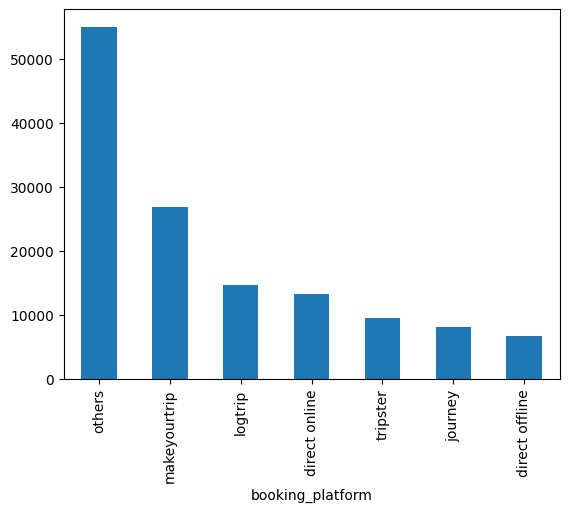

In [8]:
# now i want to plot this 
df_booking.booking_platform.value_counts().plot(kind ='bar')

In [9]:
# now i want to get quick statistics 
df_booking.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


- i can clearly see that my min rating is 1 , max is 5 , most important mean rate is 3.6
- so we have to work to get good rating atleast 4 to get a good impression 
- min no guest is -17 means data error 
- max no guest is 6 , and mean is 2


In [10]:
# reading revenue in this format is confusing so i'm brakeing it 
df_booking.revenue_generated.min(),df_booking.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

- min booking amount is 6500 
- max booking amount is 28560000 -- this maybe a error unreaalistic value for book a hotel room 

In [15]:
# lets import my other files
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

print("data loaded -dim_date.csv")
print("data loaded -dim_hotels.csv")
print("data loaded -dim_rooms.csv")
print("data loaded -fact_aggregated_bookings.csv")


data loaded -dim_date.csv
data loaded -dim_hotels.csv
data loaded -dim_rooms.csv
data loaded -fact_aggregated_bookings.csv


- let me explore hotels

In [17]:
df_hotels.shape

(25, 4)

In [18]:
df_hotels.head(4)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi


In [19]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

we have total 16 luxury and 9 business hotels
- now i want to know how many hotels we have in city wise

In [23]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: xlabel='city'>

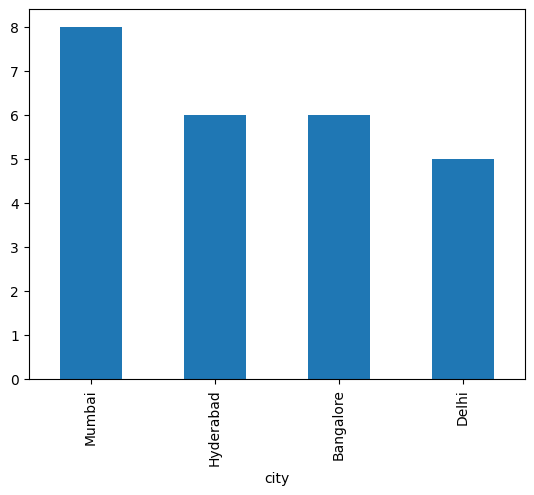

In [24]:
df_hotels.city.value_counts().plot(kind='bar')